In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Imprimir el directorio de trabajo actual
directorio = os.path.dirname(os.getcwd())
ruta_datos_paralelo = os.path.join(directorio, 'datos', 'paralelo.csv')
ruta_datos_secuencial = os.path.join(directorio, 'datos', 'secuencial.csv')

# Leer el archivo CSV
dato_paralelo = pd.read_csv(ruta_datos_paralelo)
dato_secuencial = pd.read_csv(ruta_datos_secuencial)

# Crear un índice de grupo que se reinicia cada 12 filas
dato_paralelo['GROUP'] = dato_paralelo.index // 12

In [3]:
# Ver los datos de secuencial
display(dato_secuencial)

,N,SUMA,MEDIA,DESVIACION,MAYOR,MODA,TIEMPO
0,10000,163441104,16344.0,94.78,32766,27313,0.19
1,20000,325474885,16273.0,66.83,32767,17760,0.73
2,30000,491300276,16376.0,54.74,32767,14252,1.62
3,40000,654309005,16357.0,47.32,32767,19718,2.92
4,50000,823813769,16476.0,42.27,32764,21805,4.53


In [4]:
# Obteniendo el tiempo de ejecución de secuencial
tiempo_n = dato_secuencial['TIEMPO'].values
display(tiempo_n)

array([0.19, 0.73, 1.62, 2.92, 4.53])

In [6]:
# Dividir el DataFrame en una lista de DataFrames, cada uno con 12 filas
grupos_datos_paralelo = [grupo for _, grupo in dato_paralelo.groupby('GROUP')]

# Calcular SpeedUp, Eficiencia, Coste y Overhead
for grupo_index, grupo_paralelo in enumerate(grupos_datos_paralelo):
    print(f"Grupo {grupo_index + 1}")
    
    speedup_values = []
    eficiencia_values = []
    coste_values = []
    overhead_values = []
    
    for i, row in grupo_paralelo.iterrows():
        speedup = tiempo_n[grupo_index] / row['TIEMPO']
        eficiencia = speedup / row['NH']
        coste = row['NH'] * row['TIEMPO']
        overhead = coste - row['TIEMPO'] 
        
        speedup_values.append(speedup)
        eficiencia_values.append(eficiencia)
        coste_values.append(coste)
        overhead_values.append(overhead)
    
    # Asignar los valores de SpeedUp al grupo correspondiente en dato_paralelo
    dato_paralelo.loc[dato_paralelo['GROUP'] == grupo_index, 'SPEEDUP'] = speedup_values
    dato_paralelo.loc[dato_paralelo['GROUP'] == grupo_index, 'EFICIENCIA'] = eficiencia_values
    dato_paralelo.loc[dato_paralelo['GROUP'] == grupo_index, 'COSTE'] = coste_values
    dato_paralelo.loc[dato_paralelo['GROUP'] == grupo_index, 'OVERHEAD'] = overhead_values
    display(grupo_paralelo)

Grupo 1


,NH,N,SUMA,MAYOR,MODA,MEDIA,DESVIACION,TIEMPO,GROUP,SPEEDUP,EFICIENCIA,COSTE,OVERHEAD
0,1,10000,163968237,32762,26782,16396.0,94.61,0.18,0,1.055556,1.055556,0.18,0.00
1,2,10000,163569304,32764,28074,16356.0,94.45,0.10,0,1.900000,0.950000,0.20,0.10
2,3,10000,164253055,32765,28074,16425.0,94.34,0.06,0,3.166667,1.055556,0.18,0.12
3,4,10000,164027189,32765,25547,16402.0,94.46,0.05,0,3.800000,0.950000,0.20,0.15
4,5,10000,162485832,32758,25547,16248.0,94.25,0.04,0,4.750000,0.950000,0.20,0.16
5,6,10000,162672930,32758,25547,16267.0,95.09,0.03,0,6.333333,1.055556,0.18,0.15
6,7,10000,163526921,32758,25547,16352.0,95.04,0.04,0,4.750000,0.678571,0.28,0.24
7,8,10000,163875958,32758,25547,16387.0,95.06,0.03,0,6.333333,0.791667,0.24,0.21
8,9,10000,164164109,32758,9961,16416.0,94.95,0.03,0,6.333333,0.703704,0.27,0.24
9,10,10000,164341159,32764,28,16434.0,94.36,0.03,0,6.333333,0.633333,0.30,0.27


Grupo 2


,NH,N,SUMA,MAYOR,MODA,MEDIA,DESVIACION,TIEMPO,GROUP,SPEEDUP,EFICIENCIA,COSTE,OVERHEAD
12,1,20000,328933478,32767,22879,16446.0,66.66,0.75,1,0.973333,0.973333,0.75,0.00
13,2,20000,329532604,32767,28592,16476.0,66.62,0.36,1,2.027778,1.013889,0.72,0.36
14,3,20000,328777327,32765,13245,16438.0,66.93,0.25,1,2.920000,0.973333,0.75,0.50
15,4,20000,329207783,32765,28074,16460.0,66.88,0.20,1,3.650000,0.912500,0.80,0.60
16,5,20000,328092115,32765,25547,16404.0,66.74,0.16,1,4.562500,0.912500,0.80,0.64
17,6,20000,328744902,32765,25547,16437.0,66.68,0.15,1,4.866667,0.811111,0.90,0.75
18,7,20000,328180991,32765,25547,16409.0,66.48,0.14,1,5.214286,0.744898,0.98,0.84
19,8,20000,329003756,32765,25547,16450.0,66.73,0.12,1,6.083333,0.760417,0.96,0.84
20,9,20000,327278999,32765,25547,16363.0,66.61,0.11,1,6.636364,0.737374,0.99,0.88
21,10,20000,325183315,32765,25547,16259.0,66.60,0.10,1,7.300000,0.730000,1.00,0.90


Grupo 3


,NH,N,SUMA,MAYOR,MODA,MEDIA,DESVIACION,TIEMPO,GROUP,SPEEDUP,EFICIENCIA,COSTE,OVERHEAD
24,1,30000,491270491,32767,9962,16375.0,54.63,1.70,2,0.952941,0.952941,1.70,0.00
25,2,30000,492743418,32766,6923,16424.0,54.51,0.91,2,1.780220,0.890110,1.82,0.91
26,3,30000,494069079,32767,29556,16468.0,54.60,0.64,2,2.531250,0.843750,1.92,1.28
27,4,30000,496756822,32765,29556,16558.0,54.51,0.45,2,3.600000,0.900000,1.80,1.35
28,5,30000,495673809,32765,28074,16522.0,54.48,0.37,2,4.378378,0.875676,1.85,1.48
29,6,30000,496147442,32765,28074,16538.0,54.54,0.32,2,5.062500,0.843750,1.92,1.60
30,7,30000,494001891,32765,13509,16466.0,54.45,0.30,2,5.400000,0.771429,2.10,1.80
31,8,30000,494023970,32765,25547,16467.0,54.36,0.28,2,5.785714,0.723214,2.24,1.96
32,9,30000,494306101,32765,25547,16476.0,54.34,0.25,2,6.480000,0.720000,2.25,2.00
33,10,30000,492148272,32765,5651,16404.0,54.23,0.23,2,7.043478,0.704348,2.30,2.07


Grupo 4


,NH,N,SUMA,MAYOR,MODA,MEDIA,DESVIACION,TIEMPO,GROUP,SPEEDUP,EFICIENCIA,COSTE,OVERHEAD
36,1,40000,654930401,32767,27102,16373.0,47.19,2.96,3,0.986486,0.986486,2.96,0.00
37,2,40000,658376401,32765,30498,16459.0,47.44,1.53,3,1.908497,0.954248,3.06,1.53
38,3,40000,658558797,32765,29556,16463.0,47.29,1.07,3,2.728972,0.909657,3.21,2.14
39,4,40000,659478421,32766,20183,16486.0,47.37,0.82,3,3.560976,0.890244,3.28,2.46
40,5,40000,662000225,32765,6923,16550.0,47.31,0.68,3,4.294118,0.858824,3.40,2.72
41,6,40000,661104717,32765,20666,16527.0,47.28,0.60,3,4.866667,0.811111,3.60,3.00
42,7,40000,659854156,32765,28074,16496.0,47.18,0.54,3,5.407407,0.772487,3.78,3.24
43,8,40000,660544841,32765,28074,16513.0,47.25,0.49,3,5.959184,0.744898,3.92,3.43
44,9,40000,659163021,32765,28074,16479.0,47.16,0.45,3,6.488889,0.720988,4.05,3.60
45,10,40000,657218475,32765,28074,16430.0,47.15,0.42,3,6.952381,0.695238,4.20,3.78


Grupo 5


,NH,N,SUMA,MAYOR,MODA,MEDIA,DESVIACION,TIEMPO,GROUP,SPEEDUP,EFICIENCIA,COSTE,OVERHEAD
48,1,50000,820762102,32767,21602,16415.0,42.21,4.65,4,0.974194,0.974194,4.65,0.00
49,2,50000,822850284,32767,25721,16457.0,42.29,2.41,4,1.879668,0.939834,4.82,2.41
50,3,50000,822544120,32767,2088,16450.0,42.28,1.64,4,2.762195,0.920732,4.92,3.28
51,4,50000,823748040,32765,20183,16474.0,42.18,1.29,4,3.511628,0.877907,5.16,3.87
52,5,50000,823690047,32767,25547,16473.0,42.38,1.08,4,4.194444,0.838889,5.40,4.32
53,6,50000,824269109,32765,13245,16485.0,42.30,0.99,4,4.575758,0.762626,5.94,4.95
54,7,50000,825309930,32765,25547,16506.0,42.24,0.84,4,5.392857,0.770408,5.88,5.04
55,8,50000,826780688,32765,20666,16535.0,42.08,0.77,4,5.883117,0.735390,6.16,5.39
56,9,50000,826145119,32765,20666,16522.0,42.22,0.70,4,6.471429,0.719048,6.30,5.60
57,10,50000,826564765,32765,28074,16531.0,42.20,0.67,4,6.761194,0.676119,6.70,6.03


Grupo 1


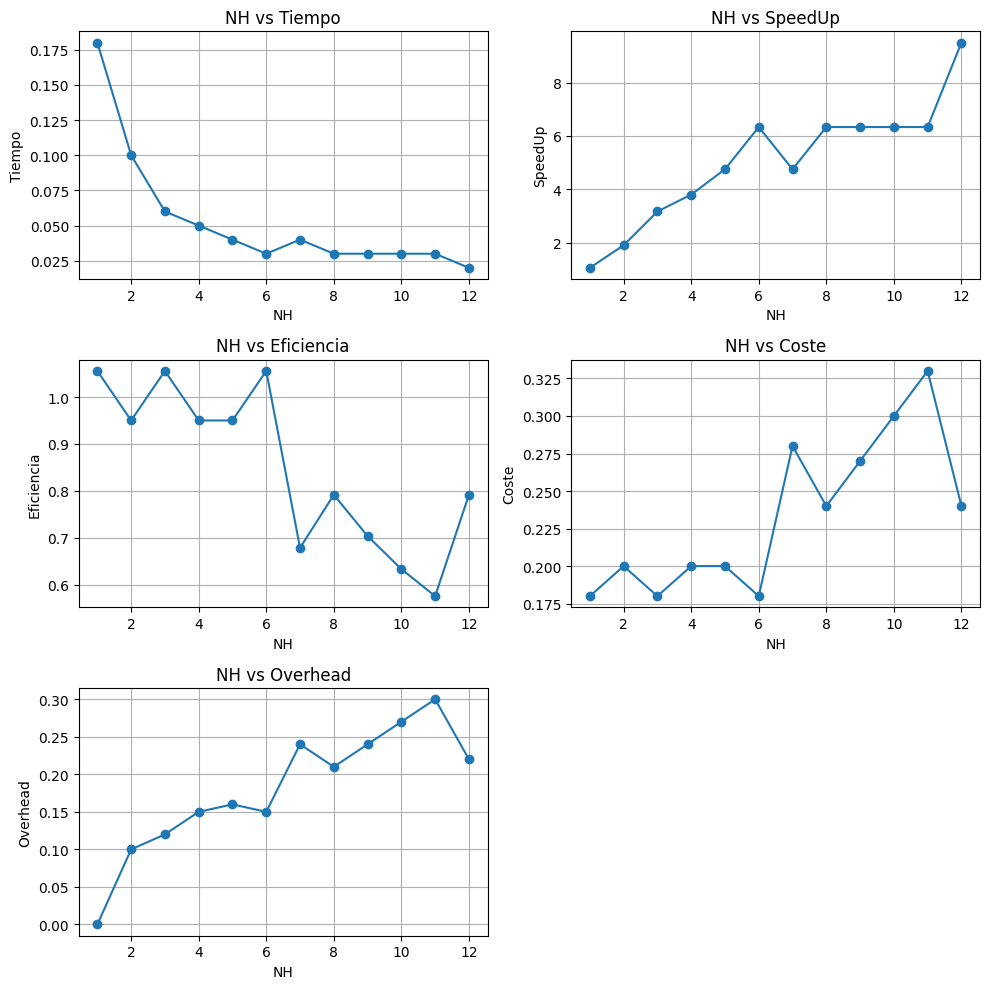

Grupo 2


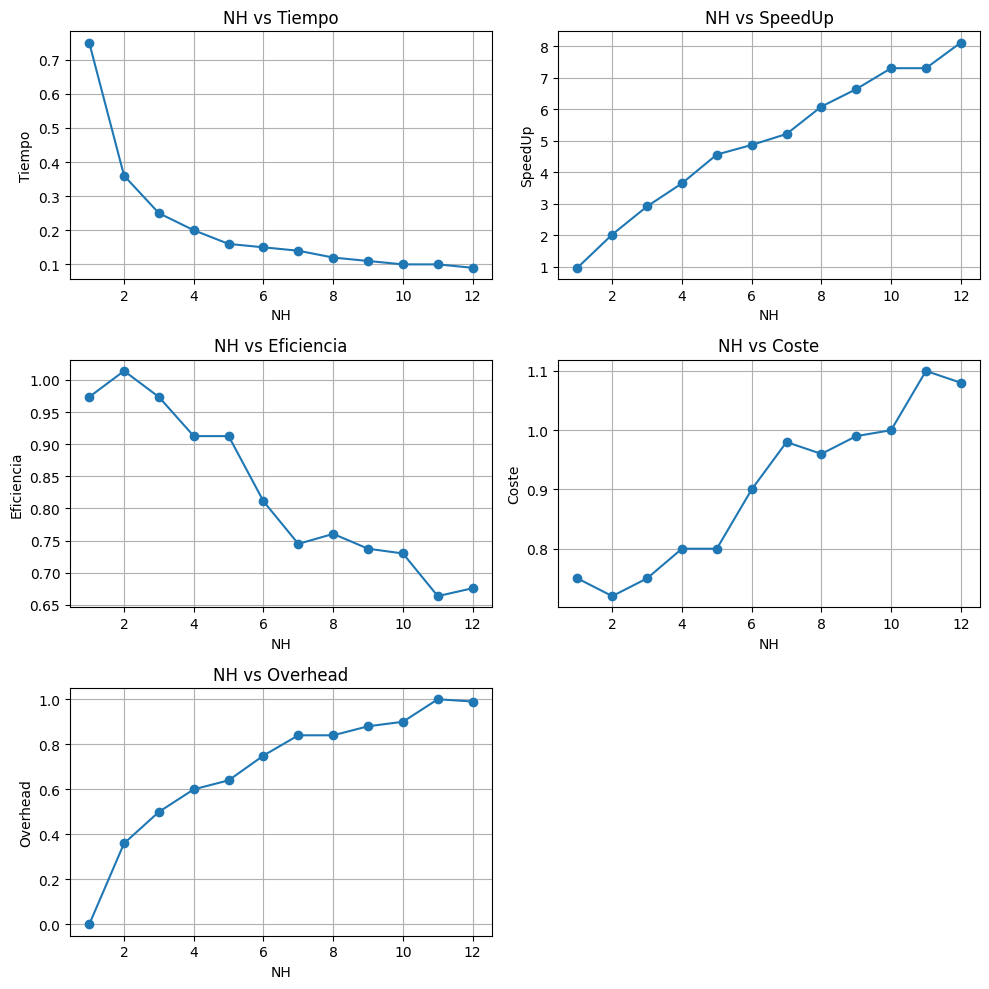

Grupo 3


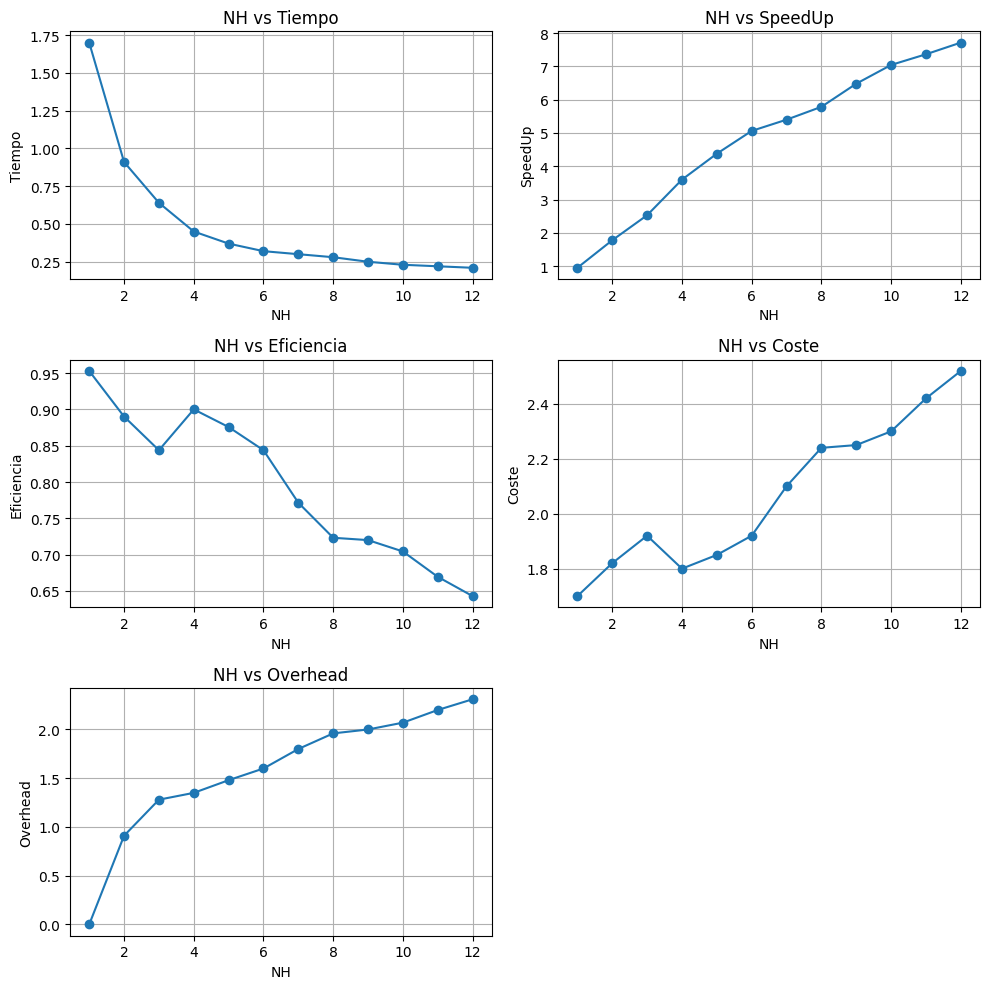

Grupo 4


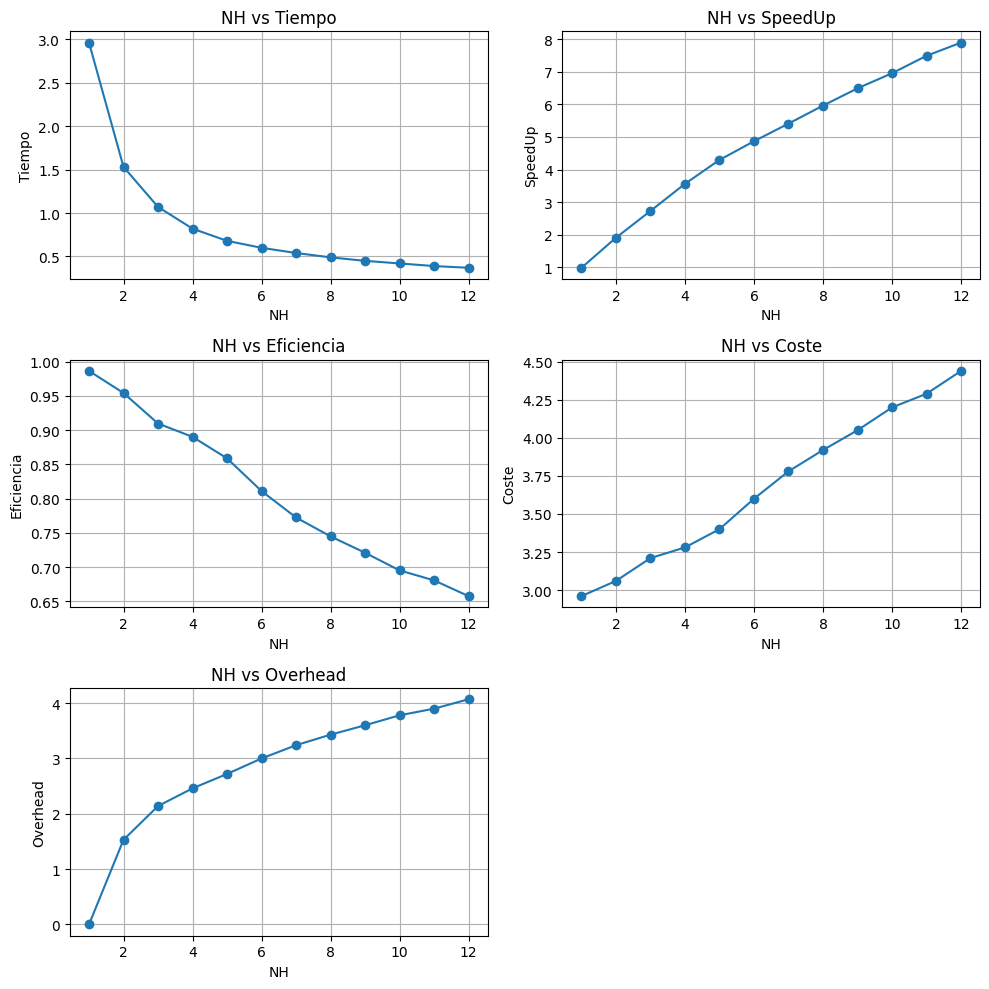

Grupo 5


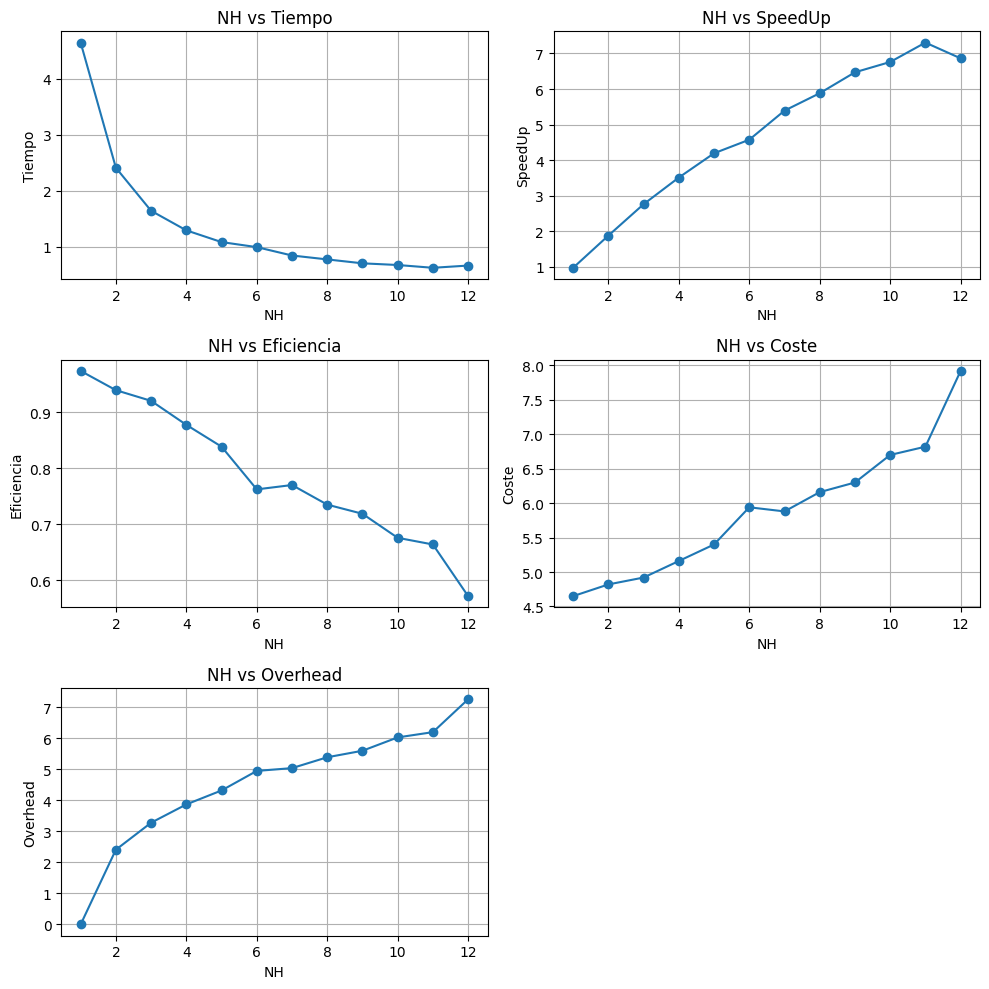

In [7]:
for grupo_index, grupo_paralelo in enumerate(grupos_datos_paralelo):
    print(f"Grupo {grupo_index + 1}")
    plt.figure(figsize=(10, 10))
    
    # Gráfica NH vs Tiempo
    plt.subplot(3, 2, 1)
    plt.plot(grupo_paralelo['NH'], grupo_paralelo['TIEMPO'], marker='o')
    plt.title('NH vs Tiempo')
    plt.xlabel('NH')
    plt.ylabel('Tiempo')
    plt.grid()
    
    # Gráfica NH vs SpeedUp
    plt.subplot(3, 2, 2)
    plt.plot(grupo_paralelo['NH'], grupo_paralelo['SPEEDUP'], marker='o')
    plt.title('NH vs SpeedUp')
    plt.xlabel('NH')
    plt.ylabel('SpeedUp')
    plt.grid()
    
    # Gráfica NH vs Eficiencia
    plt.subplot(3, 2, 3)
    plt.plot(grupo_paralelo['NH'], grupo_paralelo['EFICIENCIA'], marker='o')
    plt.title('NH vs Eficiencia')
    plt.xlabel('NH')
    plt.ylabel('Eficiencia')
    plt.grid()
    
    # Gráfica NH vs Coste
    plt.subplot(3, 2, 4)
    plt.plot(grupo_paralelo['NH'], grupo_paralelo['COSTE'], marker='o')
    plt.title('NH vs Coste')
    plt.xlabel('NH')
    plt.ylabel('Coste')
    plt.grid()
    
    # Gráfica NH vs Overhead
    plt.subplot(3, 2, 5)
    plt.plot(grupo_paralelo['NH'], grupo_paralelo['OVERHEAD'], marker='o')
    plt.title('NH vs Overhead')
    plt.xlabel('NH')
    plt.ylabel('Overhead')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    